## Human Resources Department Prject

Develop a machine learning solution to predict employee attrition based on historical data, aiming to identify factors influencing employees' decisions to leave the company. The objective is to create a robust predictive model that enables proactive measures for employee retention.

In [1]:
DF_PATH = '../data/processed/HR_Processed_Engineered.pkl'
MODEL_PATH = '../models/HR_Model.pkl'

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.compose import ColumnTransformer
import category_encoders as ce

#### Read data

In [3]:
df = pd.read_pickle(DF_PATH)
df.shape

(1470, 26)

#### Encode the target feature

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [5]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

#### Split the data into training set and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Make pipeline to train this model with specific steps

In [7]:
cat_cols = X_train.select_dtypes(include=object).columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [8]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

##### Setup the preprocessing pipelines

In [9]:
# Preprocessing
numeric_features = Pipeline(steps=[
    ('ScalingNumeric', RobustScaler())
])
categorical_features = Pipeline(steps=[
    ('EncodingCat', ce.BinaryEncoder(cols=cat_cols))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_features, numeric_cols),
        ('cat', categorical_features, cat_cols)
    ]
)

##### Add with the model training and decompisition

In [10]:
pipeline = Pipeline(steps=[
    ('Preprocessor', preprocessor),
    ('PCA', PCA(n_components=0.95, random_state=42)),
    ('Classifier', SVC(random_state=42))
])

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('ScalingNumeric',
                                                                   RobustScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'Stoc...
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('EncodingCat',
                                                                   BinaryEncoder(cols=['BusinessTravel',
                                                                                       'Department',
                                                                                       'EducationField',
                                                                                       'Gender',
                                                                                       'JobRole',
                                                                                       'MaritalStatus',
                                                                                       'OverTime']))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('PCA', PCA(n_components=0.95, random_state=42)),
                ('Classifier', SVC(random_state=42))])

In [12]:
y_pred = pipeline.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[254,   1],
       [ 32,   7]], dtype=int64)

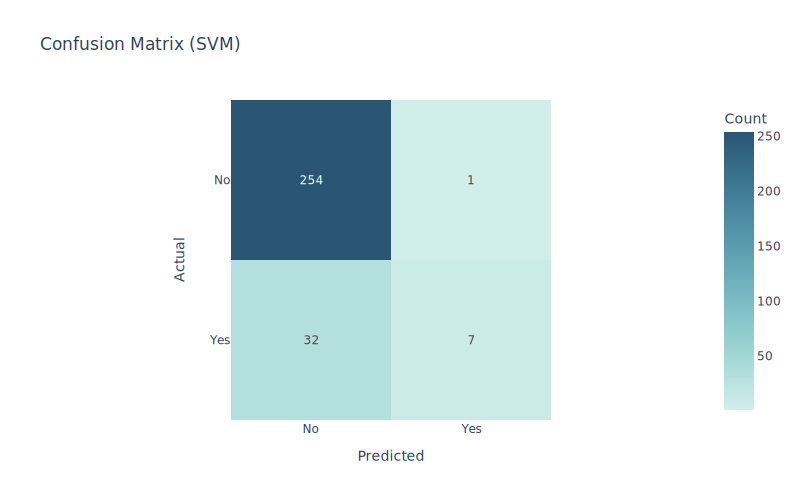

In [14]:
fig = px.imshow(cm, labels=dict(x="Predicted", y="Actual", color="Count"),
          x=['No', 'Yes'], y=['No', 'Yes'], color_continuous_scale='Teal', 
          title='Confusion Matrix (SVM)', 
          width=800, height=500,
          text_auto=True)
fig.show(renderer="png")

#### Tune the parameters of the Pipeline

In [15]:
hpt_pipeline = Pipeline(steps=[
    ('Preprocessor', preprocessor),
    ('PCA', PCA(random_state=42)),
    ('Classifier', SVC(random_state=42))
])

In [16]:
tuned_params = {
    'PCA__n_components': [0.7, 0.85, 0.95],
    'Classifier__C': [0.1, 1, 10],
    'Classifier__gamma': [0.1, 1, 10],
    'Classifier__kernel': ['linear', 'rbf', 'poly']
}

In [17]:
hpt_pipeline = GridSearchCV(hpt_pipeline, tuned_params)

In [18]:
hpt_pipeline.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('ScalingNumeric',
                                                                                          RobustScaler())]),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EnvironmentSatisfaction',
                                                                          'HourlyRate',
                                                                          'JobInvolvement',
                                                                          'JobSatisfaction',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCompaniesWorked',
                                                                          'PercentSalaryHike',
                                                                          'Relation...
                                                                                                              'MaritalStatus',
                                                                                                              'OverTime']))]),
                                                                         ['BusinessTravel',
                                                                          'Department',
                                                                          'EducationField',
                                                                          'Gender',
                                                                          'JobRole',
                                                                          'MaritalStatus',
                                                                          'OverTime'])])),
                                       ('PCA', PCA(random_state=42)),
                                       ('Classifier', SVC(random_state=42))]),
             param_grid={'Classifier__C': [0.1, 1, 10],
                         'Classifier__gamma': [0.1, 1, 10],
                         'Classifier__kernel': ['linear', 'rbf', 'poly'],
                         'PCA__n_components': [0.7, 0.85, 0.95]})

In [19]:
hpt_pipeline.best_params_

{'Classifier__C': 1,
 'Classifier__gamma': 0.1,
 'Classifier__kernel': 'linear',
 'PCA__n_components': 0.95}

In [20]:
y_pred_tuned = hpt_pipeline.predict(X_test)

In [21]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_tuned

array([[252,   3],
       [ 26,  13]], dtype=int64)

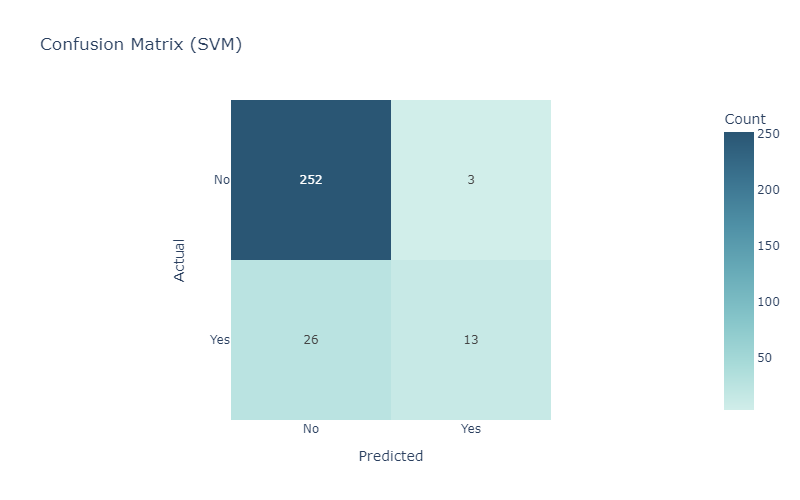

In [25]:
fig = px.imshow(cm_tuned, labels=dict(x="Predicted", y="Actual", color="Count"),
          x=['No', 'Yes'], y=['No', 'Yes'], color_continuous_scale='Teal', 
          title='Confusion Matrix (SVM)', 
          width=800, height=500,
          text_auto=True)
fig.show(renderer="png")

#### Calculating evaluation matrics from confusion matrix

In [23]:
tn, fp, fn, tp = cm_tuned.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
support = tp + fn

print(f'Accuracy of SVM model: {np.round(accuracy * 100, 2)}')
print(f'Precision of SVM model: {np.round(precision * 100, 2)}')
print(f'Recall of SVM model: {np.round(recall * 100, 2)}')
print(f'F1 Score of SVM model: {np.round(f1_score * 100, 2)}')
print(f'Support of SVM model: {support}')

Accuracy of SVM model: 90.14
Precision of SVM model: 81.25
Recall of SVM model: 33.33
F1 Score of SVM model: 47.27
Support of SVM model: 39


#### Save the model

In [24]:
joblib.dump(hpt_pipeline, MODEL_PATH)

['../models/HR_Model.pkl']